<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Ago25-26/M%C3%A9todo_de_minimos_cuadrados_regularizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def wn(x,t,n,lab):
  #Vector w -coeficientes del polinomio-
  pol=np.zeros((n,len(x))) #Creo un arreglo bidimensional de tamaño n X Longitud de x, todo acomodar en n columnas los datos de x**n
  for i in range (1,n+1):
    pol[i-1]=x**i #Por fila del arreglo bidimensional le asigno el arreglo x**n
  X=np.vstack((np.ones_like(x),pol)).T #Definimos a la matriz X con una columa de unicamente 1 y luego xi, y x1^2. El orden va ascediendo en potencias de x; x^o->x^1->x^2->...->x^n
  w=np.matmul(np.linalg.inv(np.matmul(X.T,X)+(len(t)*lab*np.identity(len(np.matmul(X.T,X))))),np.matmul(X.T,t)) #Checar dimensiones de la matriz identidad
  costo=np.matmul((t-np.matmul(X,w)).T,t-np.matmul(X,w))/len(x) #Calcular el costo total
  return w,costo+(lab*np.matmul(w.T,w)) #Regresar vector w

def costo_total(w,x,t,n):
  pol=np.zeros((n,len(x)))
  for i in range (1,n+1):
    pol[i-1]=x**i
  X=np.vstack((np.ones_like(x),pol)).T
  sum=np.matmul((t-np.matmul(X,w)).T,t-np.matmul(X,w)) #Calcular el costo total
  return sum/len(t) #regresar costo total


def pol(puntos,coefs): #Evaluar el polinomio obtenido con el método de mínimos cuadrados
  sum=0
  var_dep=np.zeros(len(puntos)) #Arreglo del resultado obtenido por el polinomio
  for j in range (0,len(puntos)):
    sum=0; #Fijo el valor del predictor (puntos) para evaluar el polinomio
    for i in range (0,len(coefs)):
      sum+=coefs[i]*(puntos[j])**i #Evaluar el polinomio; con el valor del predictor ya fijado y ciclando sobre los coeficientes por el predictor a la potencia i
    var_dep[j]=sum;
  return var_dep

0.0631685269245254


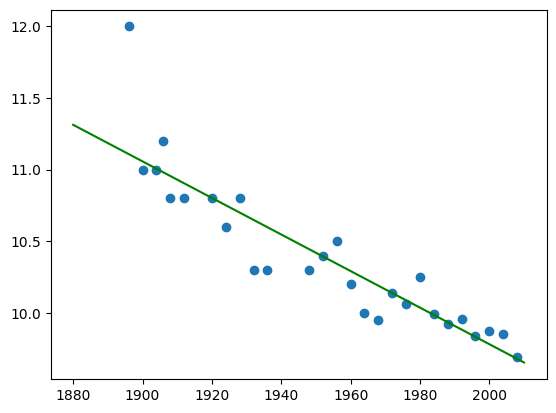

In [7]:
data=np.loadtxt("olympic100m_men.txt",delimiter=",").T

x=data[0]
y=data[1]


B=np.linspace(1880,2010,1000) #elementos para graficar
plt.scatter(x,y) #Gráfica de puntos

A1,C1=wn(x,y,1,0.00001) #Coeficientes y error
reg1=pol(B,A1)
plt.plot(B,reg1,color="green",label="Orden 1")
print(C1)

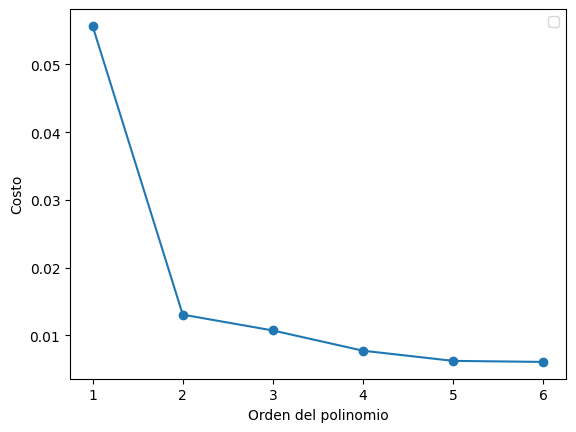

In [9]:
#Cross validation: Calculo de k y gráfica
import numpy as np
#Checar LCV

ny=np.linspace(1,6,6)

def LCV(x,t,n):
  costo=0
  for i in range(0,6):
    aux1=np.delete(x,i)
    aux2=np.delete(t,i)
    aux,cl=wn(aux1,aux2,n,0.00001) #Entreno excluyendo la observacion i en polinomio de grado n. Sólo me interesa cl -el costo total-
    costo+=cl
  return costo/len(x)

cl=np.zeros(6)

for i in range(0,6):
  cl[i]=LCV(x,y,i)

plt.scatter(ny,cl)
plt.plot(ny,cl)
plt.xlabel("Orden del polinomio")
plt.ylabel("Costo")
plt.legend()
plt.show()